# Basic algorithms for image analysis - Practice - Assignment 2

This notebook is presented as an Assignment for the course "Sensor Data Analytics" at Eötvos Lorand University (ELTE).

The goal for this assignment is to program the Prewitt edge detector: gradient filter and nonmaxima-suppression (NMS).

The output must be composed by two images: 

1. gradient magnitute; 
2. final result after NMS.

It is not allowed the use of python-libraries for performing the calculations.

## 1.- Import libraries

In [1]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt, atan2, atan, tan, pi, isclose
import time

## 2.- Read images

**Note:** We read the images online, internet connection needed

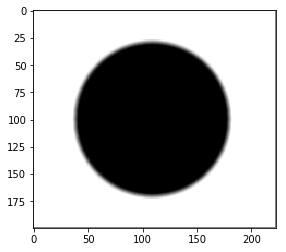

In [2]:
img = cv2.imread("circlegrey.png", 0)

plt.imshow(img, cmap='gray')
plt.show()

## 3.- Functions needed

4. **fill_borders**, compute the borders "Nearest computed value" for the borders
        Input --> new_image ; type of border selected border_option;
                  number of rows and cols of the input_image r,c 
        Output --> Final image

In [3]:
def fill_borders(new_image, r, c):
    
    new_image[0,1:c-1] = new_image[1,1:c-1]
    new_image[r-1,1:c-1] = new_image[r-2,1:c-1]
    
    new_image[:,0] = new_image[:,1]
    new_image[:,c-1] = new_image[:,c-2]
    
    return new_image

4. **operator**, computes the gradient values (or horizontal/vertical differences)
        Input --> matrix (kernel size) m; type of difference op_type
        Output --> result of the differences, result; orientation of the gradient

In [44]:
def operator(m, op_type):
    result = 0
    orientation = 0
    if op_type == "Horizontal":
        for j in range(0,2):
            result += m[0][j]*-1 + m[2][j]
        result = result/3
    elif op_type == "Vertical":
        for j in range(0,2):
            result += m[j][0]*-1 + m[j][2]
        result = result/3
    else:
        Gx = 0
        Gy = 0
        for j in range(0,2):
            Gx += m[j][0]*-1 + m[j][2]
            Gy += m[0][j]*-1 + m[2][j]
        Gx = Gx/3
        Gy = Gy/3
        result = sqrt((Gx)**2 + (Gy)**2)
        orientation = (atan2( Gy, Gx ) * 180) / pi
        
    return result, orientation

In [33]:
atan(-pi/100)*180/pi

-1.7994081741616377

In [30]:
tan(pi)

-1.2246467991473532e-16

4. **compare**, compares the first element of a vector against the rest, if it is not the biggest it returns 0
        Input --> vector v
        Output --> result pixel

In [5]:
def compare(v):
    pixel = v[0]
    for i in range(1,len(v)):
        if v[i]>pixel:
            pixel = 0
            break
    return pixel

4. **NMS_operator**, Perform the Not maximum supression algorithm
        Input --> gradient matrix image, angles of each gradient orient
        Output --> NMS image output

In [78]:
def NMS_operator(image, orient):
    output = image.copy()
    rows = image.shape[0]
    cols = image.shape[1]
    for i in range(0, image.shape[0]):
        for j in range(0,image.shape[1]):
            if (not (i < 1 or rows-i-1<1 or j < 1 or cols-j-1<1)):
                o = orient[i][j]
                if ((o<=22.5) & (o >= -22.5)) or (o>=157.5) or (o<=-157.5):
                    if not ((image[i][j-1] <= image[i][j]) & (image[i][j+1] <= image[i][j])):
                        output[i][j] = 0
                elif ((o<-22.5) and (o>=-67.5)) or ((o>112.5) and (o<=157.5)):
                    if not ((image[i-1][j+1] <= image[i][j]) & (image[i+1][j-1] <= image[i][j])):
                        output[i][j] = 0 
                elif ((o>67.5) and (o <= 112.5)) or ((o<-67.5) and (o>=-112.5)):
                    if not ((image[i+1][j] <= image[i][j]) & (image[i-1][j] <= image[i][j])):
                        output[i][j] = 0        
                elif ((o<-112.5) and (o>=-157.5)) or ((o>22.5) and (o <= 67.5)):
                    if not ((image[i-1][j-1] <= image[i][j]) & (image[i+1][j+1] <= image[i][j])):
                        output[i][j] = 0  
                
    return output

4. **Prewitt**, Perform the Prewitt algorithm
        Input --> image; boleean for displaying the images display; type of differnce op_type:
                  boleean for NMS, NMS
        Output --> Display of the original image and the result

In [49]:
def Prewitt(image, display, op_type, NMS):
    # op_type --> "Horizontal"
    # op_type --> "Vertical"
    # op_type --> "Gradient"
    
    # 1.- Initialization
    start_time = time.time()
    
    rows = image.shape[0]
    cols = image.shape[1]
    
    new_image = np.zeros(image.shape)-1
    orient = np.zeros(image.shape)
    # 2.- Loop through the elments of the output image
    
    for i in range(0,new_image.shape[0]):     
        for j in range(0,new_image.shape[1]):
            if (not (i < 1 or rows-i-1<1 or j < 1 or cols-j-1<1)):
                new_image[i][j], orient[i][j] = operator(image[i-1:i+1+1,j-1:j+1+1], op_type)
    print(np.max(orient), np.min(orient))
    plt.imshow(orient, cmap = "gray")
    plt.show()
    plt.imshow(new_image, cmap="gray")
    plt.show()
    if NMS:
        new_image = NMS_operator(new_image, orient)
        
    # 3.- If the border option 2 or 3 is selected, we compute the borders
    new_image = fill_borders(new_image, rows, cols)    
    end_time = time.time()
    
    # 4.- Display
    print("Execution time: ", end_time - start_time)    
    
    if display == True:
        plt.figure("title", figsize=(20,20))
        plt.subplot(121)
        plt.title("Original Image")
        plt.xticks([]), plt.yticks([])
        plt.imshow(image,cmap='gray')

        plt.subplot(122)
        plt.title("After filter")
        plt.xticks([]), plt.yticks([])
        plt.imshow(new_image,cmap='gray')
        
        plt.show()
    
    return orient
    

## 4.- Execution

In [57]:
ori[90,30:50]

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,  180.        , -174.47245985,
       -171.31747612, -171.08507304, -171.08507304, -167.95742486,
       -160.86635679, -135.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

180.0 -179.39690880561946


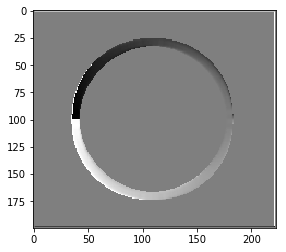

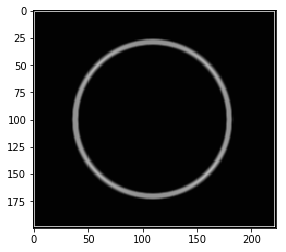

Execution time:  0.8499946594238281


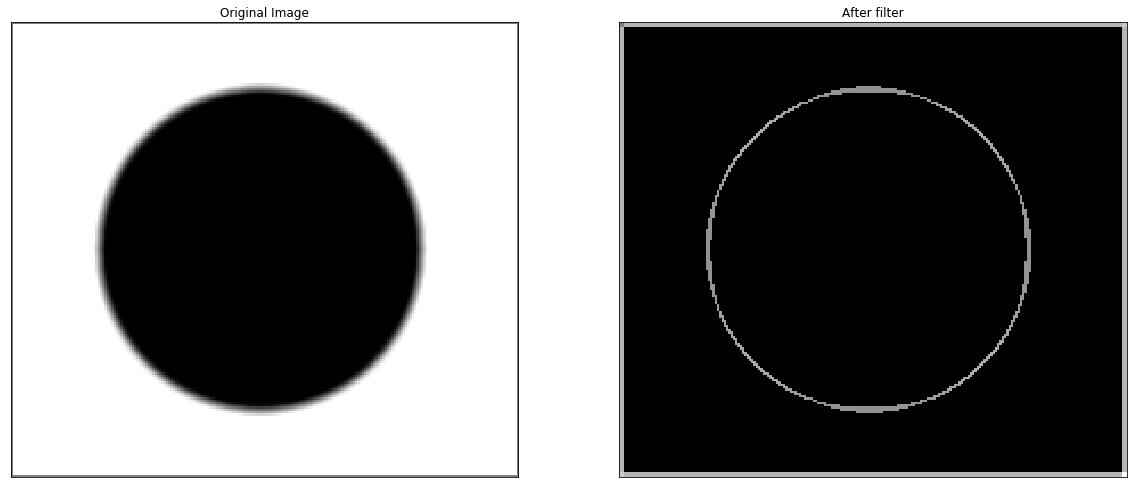

In [79]:
ori = Prewitt(img, True, "Gradient", True)

Horizontal, NMS =  False
Execution time:  2.236704111099243


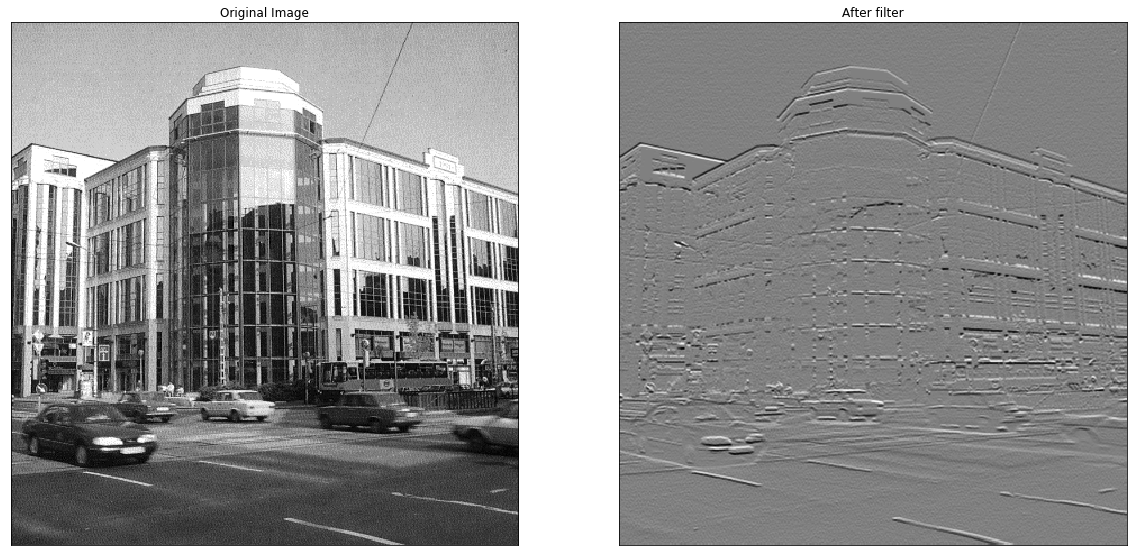

Horizontal, NMS =  True
Execution time:  3.040149211883545


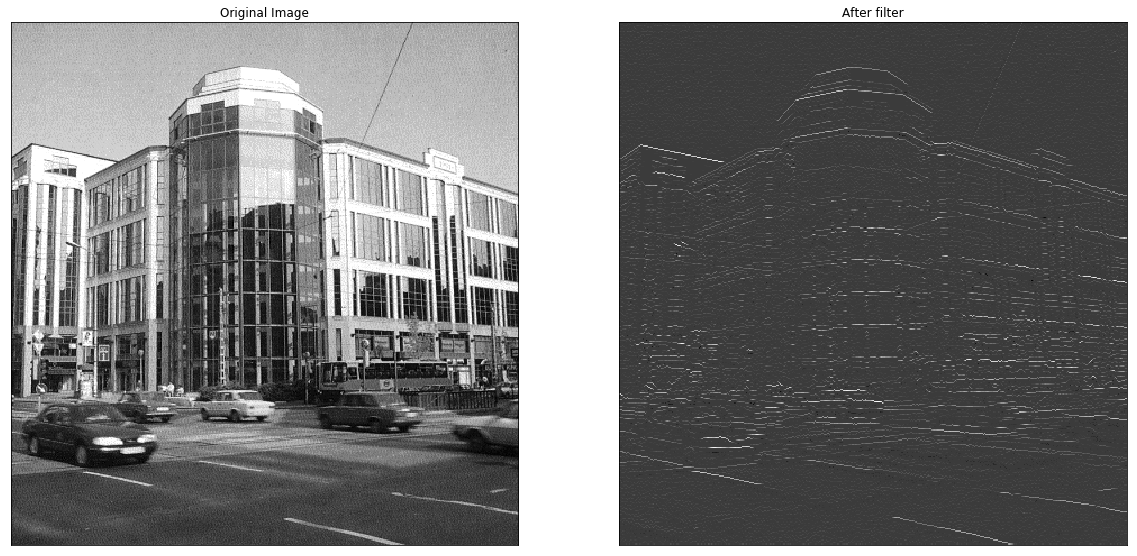

Vertical, NMS =  False
Execution time:  2.1950764656066895


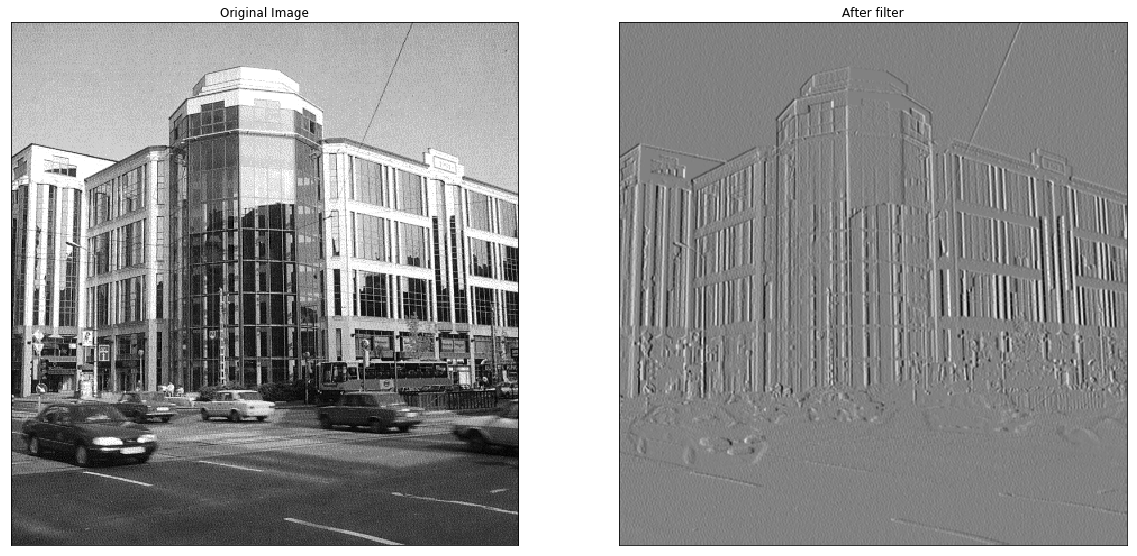

Vertical, NMS =  True
Execution time:  2.957096576690674


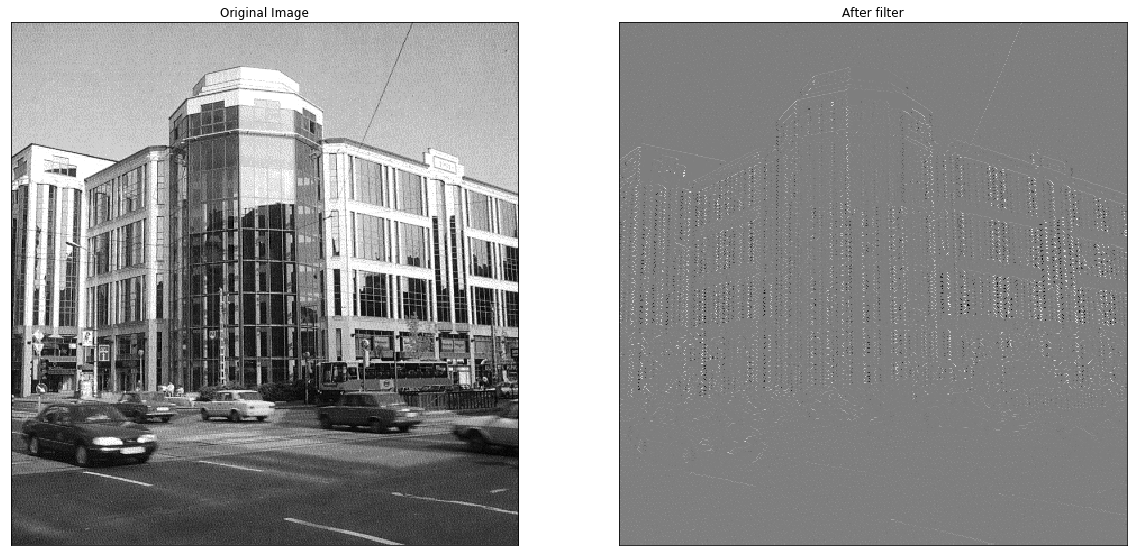

Gradient, NMS =  False
Execution time:  4.863104820251465


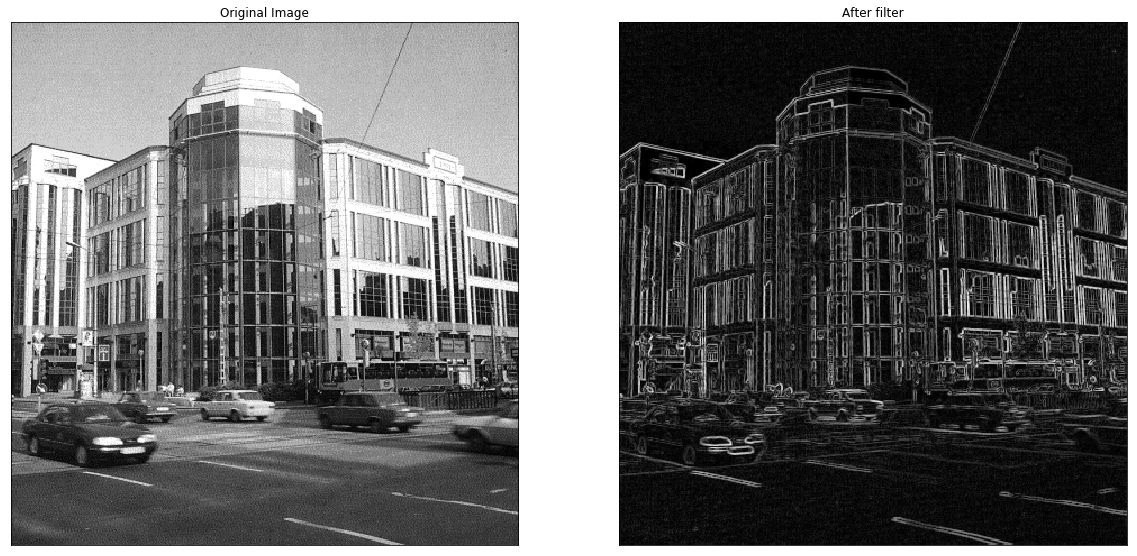

Gradient, NMS =  True
Execution time:  5.233339786529541


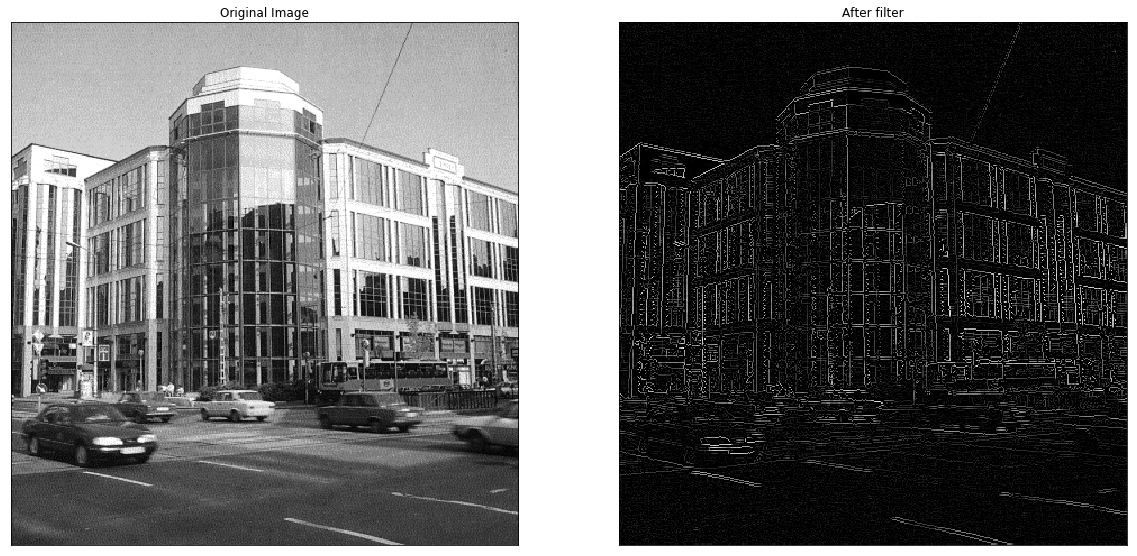

In [9]:
print("Horizontal, NMS = ", False)
Prewitt(img, True, "Horizontal", False)

print("Horizontal, NMS = ", True)
Prewitt(img, True, "Horizontal", True)

print("Vertical, NMS = ", False)
Prewitt(img, True, "Vertical", False)

print("Vertical, NMS = ", True)
Prewitt(img, True, "Vertical", True)

print("Gradient, NMS = ", False)
Prewitt(img, True, "Gradient", False)

print("Gradient, NMS = ", True)
Prewitt(img, True, "Gradient", True)


## 5.- Conclusion

We can see the different results of the horizontal, vertical and gradient difference and how the gradient difference with the not maximum supression obtain the best result